In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

csv_folder = 'csv_files'

## 2. 대리인 없는 출원의 비중

### 2-1. 대리인 없는 출원에서 개인과 법인의 비중 년도별 변화
* 대리인 없는 국내개인 출원 건수의 년도별 변화
* 대리인 없는 국내법인 출원 건수의 년도별 변화

In [3]:
df = pd.read_csv(f'{csv_folder}/APPLICANT_16_to_19.csv')
df_agent = pd.read_csv(f'{csv_folder}/AGENT_16_to_19.csv')

df.head()

,출원번호,일련번호,시도국적코드,시도국적코드명,출원인코드,출원인명,출원인영문명,출원인우편번호,출원인주소
0,4020160000161,1,01,대한민국,119980010211,동화약품주식회사,"DONG WHA PHARM. CO., LTD.",04522,"서울특별시 중구 남대문로*길 **, *-*층(다동)"
1,4020160000891,1,03,대한민국,419980149344,안부홍,"AHN, Boo Hong",06667,"서울시 서초구 명달로 **길 **-* *동 *호(서초동, 동산빌라)"
2,4020160001038,1,01,대한민국,119980002501,주식회사 케이씨씨,KCC CORPORATION,06608,서울특별시 서초구 사평대로 *** (서초동)
3,4020160001041,1,01,대한민국,119980002501,주식회사 케이씨씨,KCC CORPORATION,06608,서울특별시 서초구 사평대로 *** (서초동)
4,4020160001043,1,01,대한민국,119980002501,주식회사 케이씨씨,KCC CORPORATION,06608,서울특별시 서초구 사평대로 *** (서초동)


In [4]:
# df_applicant['출원번호_대리인'] = df_agent['출원번호']

df = df[(~df['출원번호'].isin(df_agent['출원번호'])) & (df['시도국적코드명'] == '대한민국')]

In [5]:
# 그 해의 년도 column 추가
df['출원년도'] = df['출원번호'] // 10000000 - 400000

# 출원유형 column 추가
df['출원유형'] =  ['국내법인' if s // 100000000000 == 1 else '국내개인' for s in df['출원인코드']]

In [6]:
gc = df.groupby(['출원년도', '출원유형'])['출원유형'].count()
values = gc.values
print(values)
individual = []
corporation = []
all_application = [] #

years = list(set(df['출원년도'].astype('int')))

# print(average_by_year[1])
for i in range(len(years)):
    individual.append(values[2*i])
    corporation.append(values[2*i + 1])
    all_application.append(values[2*i] + values[2*i + 1])

individual = np.array(individual)
corporation = np.array(corporation)
all_application = np.array(all_application)
print(individual, corporation, all_application)

[ 99  28 160  44 228  89 951 467]
[ 99 160 228 951] [ 28  44  89 467] [ 127  204  317 1418]


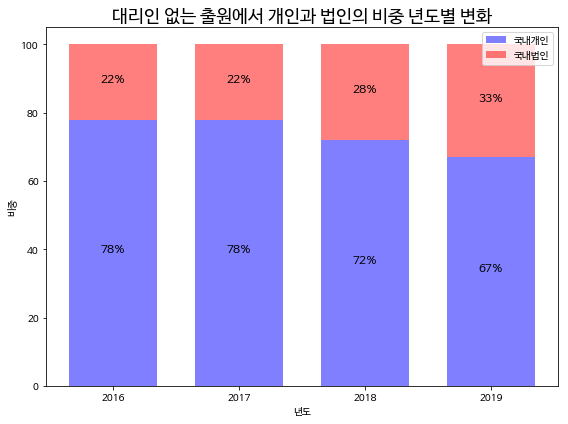

In [7]:
# function to add value labels
def add_labels(ax, x, y, y_value):
    for i in range(len(x)):
        ax.text(x[i], y[i], str(y_value[i]) + '%', ha = 'center', fontsize=12)

x = np.array(years)
labels = [2016, 2017, 2018, 2019]
width = 0.7
alpha = 0.5

totals = [i + j for i, j in zip(individual, corporation)]
bottom = np.array([int(round(i / j * 100)) for i, j in zip(individual, totals)])
up = np.array([int(round(i / j * 100, 0)) for i, j in zip(corporation, totals)])

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x, bottom, 
             width, 
             color='b', 
             alpha=alpha,
             label='국내개인')

rects2 = ax.bar(x, up, 
             width,
             bottom=bottom,
             color='r', 
             alpha=alpha,
             label='국내법인')

ax.set_title('대리인 없는 출원에서 개인과 법인의 비중 년도별 변화', fontsize=18)
ax.set_xlabel('년도')
ax.set_ylabel('비중')

ax.set_xticks(x)
ax.set_xticklabels(labels)

add_labels(ax, x, bottom / 2, bottom)
add_labels(ax, x, (bottom + (100 - bottom) / 2) , up)
ax.legend()

fig.tight_layout()
plt.show()

### 2-2. 년도별 대리인 없는 출원(a) vs 대리인 있는 출원 중 하기 대리인을 제외한 출원 vs 상기 대리인들의 출원을 비교.

In [8]:
df = pd.read_csv(f'{csv_folder}/APPLICANT_16_to_19.csv') # 재할당
df_agent = pd.read_csv(f'{csv_folder}/AGENT_16_to_19.csv')
df_agent.head()

,출원번호,일련번호,시도국적코드,시도국적코드명,대리인코드,대리인명,대리인영문명,대리인우편번호,대리인주소
0,4020160000891,1,01,대한민국,919980005582,최달용,"CHOI, Dall Ryong",06653,"서울시 서초구 효령로**길 **, *층(서초동, 진란회관)(최달용국제특허법률사무소)"
1,4020160001038,1,01,대한민국,920040001239,전숙현,JEON SOOK HYUN,06252,"서울특별시 강남구 역삼로 *** *층 (역삼동, 현죽빌딩)(특허법인성암)"
2,4020160001038,2,01,대한민국,920020001891,서경민,Suh Kyung Min,06252,"서울특별시 강남구 역삼로 *** *층 (역삼동, 현죽빌딩)(특허법인성암)"
3,4020160001038,3,01,대한민국,919980002604,서만규,Suh Man Kyu,06252,"서울특별시 강남구 역삼로 *** *층 (역삼동, 현죽빌딩)(특허법인성암)"
4,4020160001041,1,01,대한민국,920040001239,전숙현,JEON SOOK HYUN,06252,"서울특별시 강남구 역삼로 *** *층 (역삼동, 현죽빌딩)(특허법인성암)"


In [9]:
agent_list = [920141001614, 920150009821, 920200004635, 920080013076, 920080004829,
              920050008260, 920160025058, 919980003369, 920060009347, 920120000996,
              920000000193, 919980001687, 919980001002, 920180000325, 920010000824,
              920160010250]
df_agent = df_agent[(df_agent['출원번호'].isin(df['출원번호']))]
df_agent.head()

,출원번호,일련번호,시도국적코드,시도국적코드명,대리인코드,대리인명,대리인영문명,대리인우편번호,대리인주소
0,4020160000891,1,01,대한민국,919980005582,최달용,"CHOI, Dall Ryong",06653,"서울시 서초구 효령로**길 **, *층(서초동, 진란회관)(최달용국제특허법률사무소)"
1,4020160001038,1,01,대한민국,920040001239,전숙현,JEON SOOK HYUN,06252,"서울특별시 강남구 역삼로 *** *층 (역삼동, 현죽빌딩)(특허법인성암)"
2,4020160001038,2,01,대한민국,920020001891,서경민,Suh Kyung Min,06252,"서울특별시 강남구 역삼로 *** *층 (역삼동, 현죽빌딩)(특허법인성암)"
3,4020160001038,3,01,대한민국,919980002604,서만규,Suh Man Kyu,06252,"서울특별시 강남구 역삼로 *** *층 (역삼동, 현죽빌딩)(특허법인성암)"
4,4020160001041,1,01,대한민국,920040001239,전숙현,JEON SOOK HYUN,06252,"서울특별시 강남구 역삼로 *** *층 (역삼동, 현죽빌딩)(특허법인성암)"


In [10]:
df_agent['출원년도'] = df_agent['출원번호'] // 10000000 - 400000

# 대리인목록에 없는 데이터
df_without_agent = df_agent[~df_agent['대리인코드'].isin(agent_list)]
not_agent = df_without_agent.groupby(['출원년도'])['출원번호'].count().values
print(not_agent)

# 대리인목록에 있는 데이터
df_with_agent = df_agent[df_agent['대리인코드'].isin(agent_list)]
with_agent = df_with_agent.groupby(['출원년도'])['출원번호'].count().values
print(with_agent)

[  938  1295  1447 10910]
[  95  271  430 1532]


In [11]:
# a. 대리인 없는 출원 총합
all_application

array([ 127,  204,  317, 1418], dtype=int64)

In [12]:
# b. 대리인 있는출원 중 대리인리스트에 없는 출원
not_agent

array([  938,  1295,  1447, 10910], dtype=int64)

In [13]:
# c. 대리인 있는출원 중 대리인리스트에 있는 출원
with_agent

array([  95,  271,  430, 1532], dtype=int64)

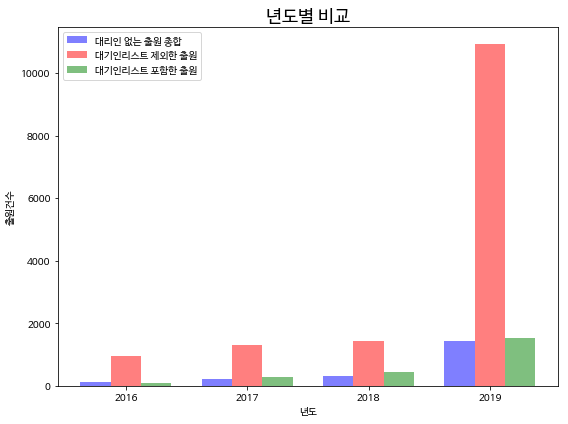

In [14]:
x = np.array(years)
labels = [2016, 2017, 2018, 2019]
width = 0.25
alpha = 0.5

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width, all_application, 
             width, 
             color='b', 
             alpha=alpha,
             label='대리인 없는 출원 총합')

rects2 = ax.bar(x, not_agent, 
             width,
             color='r', 
             alpha=alpha,
             label='대기인리스트 제외한 출원')

rects3 = ax.bar(x + width, with_agent, 
             width,
             color='g', 
             alpha=alpha,
             label='대기인리스트 포함한 출원')

ax.set_title('년도별 비교', fontsize=18)
ax.set_xlabel('년도')
ax.set_ylabel('출원건수')

ax.set_xticks(x)
ax.set_xticklabels(labels)
# add_labels(ax, x - width/2, individual)
# add_labels(ax, x + width/2, corporation)
ax.legend()

fig.tight_layout()
plt.show()